# Twitter Sentiment Analysis

Lets see if we can determine if certain tweets are negative or positive

## Import Libaries

### Import Pandas and Matlab Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Import SciKit-Learn Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

## Download Dataset from University of Michigan

The dataset can be found from this [kaggle page](https://www.kaggle.com/c/si650winter11)

In [3]:
data_df = pd.read_csv("trainingdata.txt", sep='\t')

Lets shuffle the data, just incase it is ordered

In [4]:
data_df = data_df.sample(frac=1).reset_index(drop=True)

Split the data into training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_df['tweet'], data_df['label'])

Implement Bag of Words 

In [6]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

Create Naive Bayesian Model using Scikit-Learn

In [7]:
#Naive Bayes 
gnb = GaussianNB()
y_pred = gnb.fit(X_train_counts.toarray(), y_train).predict(X_test_counts.toarray())

How Accurate and Precise is our model?

In [8]:
fscore = f1_score(y_test, y_pred)
print(fscore)

0.9809376609994849


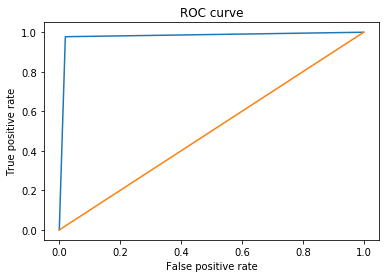

In [9]:
rocscores = roc_curve(y_test, y_pred)
plt.plot(rocscores[0], rocscores[1])
plt.plot(rocscores[0],rocscores[0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()